# *** OLYMPICS DATASET ANALYSIS ***
  ***IMPORTING LIBRARIES AND MODULES***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [7]:
athlete = pd.read_csv("/content/athlete_events.csv")
noc= pd.read_csv("/content/noc_regions.csv")

In [8]:
ath = athlete.copy()
noc=noc.copy()

## ***DATA EXPLORATION***

In [16]:
ath.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [15]:
ath.tail()


ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [ ]:
noc.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [12]:
ath.info() ###info on the dataframe###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
ath.describe() # statistical information of ath dataset

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [14]:
ath.shape # number of rows and columns respectively of dataset

(271116, 15)

In [17]:
ath.isnull()

ID   Name    Sex    Age  Height  Weight   Team    NOC  Games  \
0       False  False  False  False   False   False  False  False  False   
1       False  False  False  False   False   False  False  False  False   
2       False  False  False  False    True    True  False  False  False   
3       False  False  False  False    True    True  False  False  False   
4       False  False  False  False   False   False  False  False  False   
...       ...    ...    ...    ...     ...     ...    ...    ...    ...   
271111  False  False  False  False   False   False  False  False  False   
271112  False  False  False  False   False   False  False  False  False   
271113  False  False  False  False   False   False  False  False  False   
271114  False  False  False  False   False   False  False  False  False   
271115  False  False  False  False   False   False  False  False  False   

         Year  Season   City  Sport  Event  Medal  
0       False   False  False  False  False   True  
1       False   False  False  False  False   True  
2       False   False  False  False  False   True  
3       False   False  False  False  False  False  
4       False   False  False  False  False   True  
...       ...     ...    ...    ...    ...    ...  
271111  False   False  False  False  False   True  
271112  False   False  False  False  False   True  
271113  False   False  False  False  False   True  
271114  False   False  False  False  False   True  
271115  False   False  False  False  False   True  

[271116 rows x 15 columns]

In [19]:
ath.isnull().sum() # identifying null values in each column

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Observations :                                       

*   Columns Age, Height, Weight, And Medal have null(nan) values
*   Column Games is redundant, as it is just the combination of season and year
*   Column Event has deflections 




# ***DATA CLEANING & MANIPULATION*** 

1. Adding a new column 'region' that maps the NOC values in ath and noc datasets.
---

In [25]:
reg = ath['NOC'].map(noc.set_index('NOC')['region'])  # inserting region
ath.insert(7,'Region',reg)

In [27]:
ath.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

        Region  NOC        Games  Year  Season       City          Sport  \
0        China  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1        China  CHN  2012 Summer  2012  Summer     London           Judo   
2      Denmark  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3      Denmark  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  Netherlands  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [28]:
ath.drop('NOC', inplace=True, axis=1)

In [29]:
ath.head(1)

ID       Name Sex   Age  Height  Weight   Team Region        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  China  1992 Summer  1992   

   Season       City       Sport                        Event Medal  
0  Summer  Barcelona  Basketball  Basketball Men's Basketball   NaN

2. Handling Null Values in Age, Height and Weight columns with mean values
---






In [31]:
ath['Age'].fillna(ath.Age.mean(),inplace=True)
ath['Height'].fillna(ath.Height.mean(),inplace=True)
ath['Weight'].fillna(ath.Weight.mean(),inplace=True)

In [33]:
ath.isnull().sum() # No nan values in Age, Height and Weight Columns

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
Region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [34]:
ath.iloc[[147]]

ID                   Name Sex        Age     Height     Weight  Team  \
147  54  Mohamed Jamshid Abadi   M  25.556898  175.33897  70.702393  Iran   

    Region        Games  Year  Season    City   Sport  \
147   Iran  1948 Summer  1948  Summer  London  Boxing   

                        Event Medal  
147  Boxing Men's Heavyweight   NaN

3. Handling region nan values
---

In [36]:
ath[ath.Region.isna()].head() # selecting those datapoints that have region as nan

ID                             Name Sex   Age     Height     Weight  \
578    332                 Zarinah Abdullah   F  21.0  175.33897  70.702393   
579    332                 Zarinah Abdullah   F  25.0  175.33897  70.702393   
2719  1515  Saiyidah Aisyah Mohamed Rafa'ee   F  28.0  173.00000  68.000000   
6267  3515              Paulo Amotun Lokoro   M  24.0  170.00000  61.000000   
7659  4264                   Ang Peng Siong   M  21.0  180.00000  75.000000   

                          Team Region        Games  Year  Season  \
578                  Singapore    NaN  1992 Summer  1992  Summer   
579                  Singapore    NaN  1996 Summer  1996  Summer   
2719                 Singapore    NaN  2016 Summer  2016  Summer   
6267  Refugee Olympic Athletes    NaN  2016 Summer  2016  Summer   
7659                 Singapore    NaN  1984 Summer  1984  Summer   

                City      Sport                                Event Medal  
578        Barcelona  Badminton            Badminton Women's Singles   NaN  
579          Atlanta  Badminton            Badminton Women's Singles   NaN  
2719  Rio de Janeiro     Rowing         Rowing Women's Single Sculls   NaN  
6267  Rio de Janeiro  Athletics         Athletics Men's 1,500 metres   NaN  
7659     Los Angeles   Swimming  Swimming Men's 100 metres Freestyle   NaN

In [40]:
#searching whether Team like Singapore has an equivalent region in noc column, if not then cant modify the nan values 

noc.where(noc['region']=='Singapore')

NOC region notes
0    NaN    NaN   NaN
1    NaN    NaN   NaN
2    NaN    NaN   NaN
3    NaN    NaN   NaN
4    NaN    NaN   NaN
..   ...    ...   ...
225  NaN    NaN   NaN
226  NaN    NaN   NaN
227  NaN    NaN   NaN
228  NaN    NaN   NaN
229  NaN    NaN   NaN

[230 rows x 3 columns]

4. Dropping off irrelevant columns
---

In [41]:
ath.drop(['Games','Region'], inplace=True, axis=1)

In [43]:
ath.head(1)

ID       Name Sex   Age  Height  Weight   Team  Year  Season       City  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  1992  Summer  Barcelona   

        Sport                        Event Medal  
0  Basketball  Basketball Men's Basketball   NaN

5. Handling nan values of Medal Column
---

In [45]:
ath['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [46]:
ath['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [51]:
ath['Medal'].isnull().sum()

231333

In [53]:
ath['Medal'].fillna(0,inplace = True)

In [54]:
ath['Medal'].isnull().sum()

0

In [55]:
ath.head()

ID                      Name Sex   Age     Height     Weight  \
0   1                 A Dijiang   M  24.0  180.00000  80.000000   
1   2                  A Lamusi   M  23.0  170.00000  60.000000   
2   3       Gunnar Nielsen Aaby   M  24.0  175.33897  70.702393   
3   4      Edgar Lindenau Aabye   M  34.0  175.33897  70.702393   
4   5  Christine Jacoba Aaftink   F  21.0  185.00000  82.000000   

             Team  Year  Season       City          Sport  \
0           China  1992  Summer  Barcelona     Basketball   
1           China  2012  Summer     London           Judo   
2         Denmark  1920  Summer  Antwerpen       Football   
3  Denmark/Sweden  1900  Summer      Paris     Tug-Of-War   
4     Netherlands  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball     0  
1      Judo Men's Extra-Lightweight     0  
2           Football Men's Football     0  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres     0

In [56]:
# now replace Gold with 1, Silver with 2 and Bronze with 3
ath.Medal.replace({'Gold':1,'Silver':2,'Bronze':3},inplace=True)

In [57]:
ath.head(4)

ID                  Name Sex   Age     Height     Weight            Team  \
0   1             A Dijiang   M  24.0  180.00000  80.000000           China   
1   2              A Lamusi   M  23.0  170.00000  60.000000           China   
2   3   Gunnar Nielsen Aaby   M  24.0  175.33897  70.702393         Denmark   
3   4  Edgar Lindenau Aabye   M  34.0  175.33897  70.702393  Denmark/Sweden   

   Year  Season       City       Sport                         Event  Medal  
0  1992  Summer  Barcelona  Basketball   Basketball Men's Basketball      0  
1  2012  Summer     London        Judo  Judo Men's Extra-Lightweight      0  
2  1920  Summer  Antwerpen    Football       Football Men's Football      0  
3  1900  Summer      Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      1

In [58]:
# changing datatype of Medal
ath.Medal = ath.Medal.astype(int)

In [59]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 26.9+ MB


6. Removing unwanted phrase from Event Column
---

In [ ]:
for i,j in zip(ath.Sport, range(len(ath.Event))):
  ath.Event[j] = re.sub(f"{i}+\s","",ath.Event[j])


In [61]:
ath.head()

ID                      Name Sex   Age     Height     Weight  \
0   1                 A Dijiang   M  24.0  180.00000  80.000000   
1   2                  A Lamusi   M  23.0  170.00000  60.000000   
2   3       Gunnar Nielsen Aaby   M  24.0  175.33897  70.702393   
3   4      Edgar Lindenau Aabye   M  34.0  175.33897  70.702393   
4   5  Christine Jacoba Aaftink   F  21.0  185.00000  82.000000   

             Team  Year  Season       City          Sport  \
0           China  1992  Summer  Barcelona     Basketball   
1           China  2012  Summer     London           Judo   
2         Denmark  1920  Summer  Antwerpen       Football   
3  Denmark/Sweden  1900  Summer      Paris     Tug-Of-War   
4     Netherlands  1988  Winter    Calgary  Speed Skating   

                     Event  Medal  
0         Men's Basketball      0  
1  Men's Extra-Lightweight      0  
2           Men's Football      0  
3         Men's Tug-Of-War      1  
4       Women's 500 metres      0

7. Changing datatype of Age
---

In [62]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 26.9+ MB


In [63]:
ath.Age = ath.Age.astype(int)

In [64]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 26.9+ MB


## ***DATA ANALYSIS***

1. Relationship Between Height And Weight Columns
---

Text(0.5, 1.0, 'Height Vs Weight')

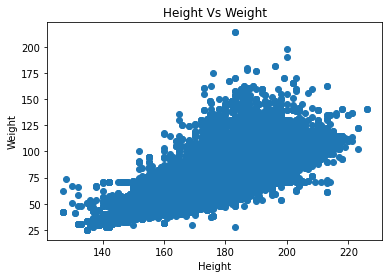

In [65]:
x = ath.Height
y = ath.Weight
plt.scatter(x,y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height Vs Weight')

Conclusion : As Height increases Weight increases


2.  Number Of Males and Females participated in the Olympics from 1986 to 2016

---


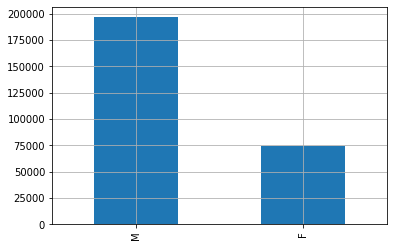

In [76]:
ath['Sex'].value_counts().plot.bar(ath['Sex'])
plt.grid()

Conclusion: Number of Females are 75000 and Males are approximately nearer to 200000

3. How Many M and F participated in Summer and Winter Olympics
---

In [79]:
import plotly.express as px

In [80]:
fig= px.histogram(ath,x=ath.Season,color = ath.Sex, barmode="group")
fig.show()

Conclusion: No of Males in Summer Olympics is 163.109k, while Females is 59.443k 
No of Males in Winter Olympics is 33.48K, while Females is 15.079k.
This trend shows that most participants prefer Summer to Winter Olympics

4. Top 10 Countries with maximum medals
---

In [86]:
ath['Team'].unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [88]:
x = ath['Team'].value_counts()
x[0:10]


United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

Conclusion: USA, France, Great Britain, Italy, Germany, Canada, Japan, Swedan, Australia, and Hungary are top 10 countries with most medals

5. Analyse Women participants trends in the Olympics
---

In [91]:
y = ath[ath['Sex']=='F']['Sex']
fig = px.histogram(y,x = ath.Year)
fig.show()

Conclusion: This shows the increase in the participation of women over the years


6. Calculate the Number of medals( no medal, gold, silver and bronze) won by Males and Females
---

In [101]:

fig = px.histogram(ath,x = ath.Sex, color= ath.Medal, barmode='group')
fig.show()

Conclusion: From the representaion;
Men have won 9625 Gold medals, 9524 Silver medals and 9381 Bronze medals
Women have won 3747 gold medals, 3771 silver medals and 3735 bronze medals
Also 168064 men failed to win any medal, also 63269 females failed to win any medal.  

